In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast


from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills']= df['job_skills'].apply(lambda job_skills: ast.literal_eval(job_skills) if pd.notna(job_skills) else job_skills)

df['job_skills']

0                                                      None
1                [r, python, sql, nosql, power bi, tableau]
2         [python, sql, c#, azure, airflow, dax, docker,...
3         [python, c++, java, matlab, aws, tensorflow, k...
4         [bash, python, oracle, aws, ansible, puppet, j...
                                ...                        
785736    [bash, python, perl, linux, unix, kubernetes, ...
785737                               [sas, sas, sql, excel]
785738                                  [powerpoint, excel]
785739    [python, go, nosql, sql, mongo, shell, mysql, ...
785740                                          [aws, flow]
Name: job_skills, Length: 785741, dtype: object

Question
How are skills trending for Data Analysts on a monthly basis.

In [3]:
df_DA = df[df['job_title_short']== 'Data Analyst'].copy()

In [4]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

In [5]:
df_DA_explode = df_DA.explode('job_skills')

In [6]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [7]:
df_DA_pivot.loc['Total']= df_DA_pivot.sum()

In [8]:
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending = False).index]

In [9]:
df_DA_pivot = df_DA_pivot.drop('Total')

In [10]:
df_DA_pivot = df_DA_pivot.reset_index()

In [11]:
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format= '%m').strftime('%b'))

In [12]:
df_DA_pivot = df_DA_pivot.set_index('job_posted_month').drop(columns = 'job_posted_month_no')

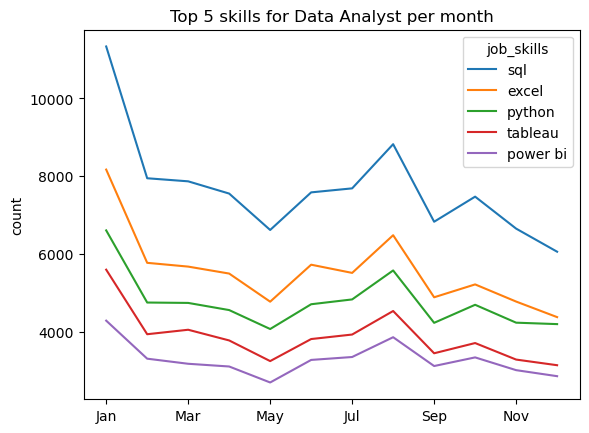

In [13]:
df_DA_pivot.iloc[:, :5].plot(kind = 'line')
plt.title('Top 5 skills for Data Analyst per month')
plt.xlabel('')
plt.ylabel('count')
plt.show()